In [1]:
from src.setup import *

# Data Quality

> All data is dirty, some data is useful.<br/>–c.f. George Box

In the earlier lessons, we looked at how one goes about getting the data into an analysis system and touched on identifying data that has clearly "gone bad" at the level of individual data points in other lessons.  In this lesson we look at remediation of messy and marked data.

Your data may have problems, not in its individual details, but in its overall "shape" and character.  In some cases, these problems will pertain to the general collection techniques used, and to systematic bias that might be introduced during collection.  In other cases, problems are not the fault of data collectors, but simply of units and scales, and correction can be quite mechanical and routine.

## Missing Data

> Absence of evidence is not evidence of absence.<br/>–Martin Rees

The course has looked at mechanical or statistical tests to identify some data as missing, or as unreliable enough that it is better to pretend it is missing.  We have not yet decided whether to keep or drop the observations to which those missing data points belong.  We need to access the significance of those missing data to our overall data set.

When we have a record with missing data, we essentially have two choices about its disposition.  On the one hand, we can discard that particular record.  On the other hand, we can impute some value for the missing value.  Imputation is discussed in the next lesson.

In some sense there is a third options as well: we may decide that because of the amount or distribution of missing data in our data set, the data is simply not usable for the purpose at hand.  While, as data scientists we never want to declare a task hopeless, as responsible researchers we need to consider the possibility that particular data simply cannot support any conclusions.  Missing data is not the *only* thing that could lead us to this conclusion, but it is certainly one common fatal deficit.

In [2]:
df = pd.read_parquet('data/usa_names.parq') 
df

,Age,Gender,Name,Favorite_Color,Favorite_Flower
0,48,F,Lisa,Yellow,Daisy
1,62,F,Karen,Green,Rose
2,26,M,Michael,Purple,None
3,73,F,Patricia,Red,Orchid
4,13,F,Ava,Green,Violet
...,...,...,...,...,...
6337,36,M,Michael,None,Violet
6338,11,M,Jacob,Red,Lily
6339,20,M,Jacob,Green,Rose
6340,72,M,Robert,Blue,Lily


If we wish to discard records—but also to a large extent if we wish to impute values—we need to think about whether what remains will be a fair representation of the parameter space of the data.  Sample bias can exist not only in the overall composition of a data set, but also more subtly in the distribution of missing values.  Keep in mind that "missing" here might result from the processing discussed in the _Anamoly Detection_ lesson.  Some values may have been marked missing because we could determine they were unreliable, even if they were not per se absent in the raw data.

I created a hypopthetical data set of persons with names, ages, gender, and favorite color and flower.  The ages, genders, and names, are modeled on the actual distribution of popular names over time reported by the United States Social Security Administration.  I assigned favorite colors and flowers to the people for this illustration.

In [3]:
df.describe(include='all')

,Age,Gender,Name,Favorite_Color,Favorite_Flower
count,6342.000000,6342,6342,5599,5574
unique,NaN,2,69,6,5
top,NaN,F,Michael,Yellow,Orchid
freq,NaN,3190,535,965,1356
mean,42.458846,NaN,NaN,NaN,NaN
std,27.312662,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN
25%,19.000000,NaN,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN
75%,63.000000,NaN,NaN,NaN,NaN


In general, this is an ordinary looking data set, with a moderately large collection of records.  We can notice in the DataFrame summary that at least some data is missing.  This is worth investigating more carefully.

Using Panda's `.describe()` method or similar summaries by other tools allows us to see that `Age`, `Gender`, and `Name` have values for all 6,342 records.  However, `Favorite_Color` and `Favorite_Flower` are missing for approximately 750 records each.  In itself, missing data in 10-15% of the rows is quite likely not to be a huge problem.  

That statement assumes that missingness is not itself biased. Even if we need to discard those records altogether, that is a relatively small fraction of a relatively large data set.  Likewise, imputing values would *probably* not introduce too much bias, and other features could be utilized within those records.  In the below section and in the lesson on _Value Imputation_, in relation to undersampling and oversampling, I'll discuss dangers of exclusion resulting in class imbalance.

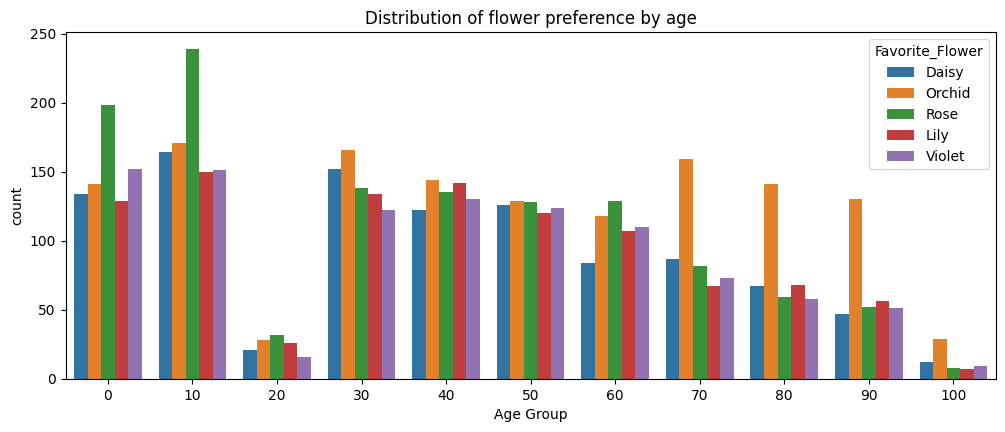

In [4]:
df['Age Group'] = df.Age//10 * 10
fig, ax = plt.subplots(figsize=(12, 4.5))
sns.countplot(x="Age Group", hue="Favorite_Flower", ax=ax, data=df)
ax.set_title("Distribution of flower preference by age");

While uniformly randomly missing data can be worked around relatively easily, data that is missing in a biased way can present a more significant problem.  To figure out which category we are in with this dataset, let us compare those missing flower preferences to the ages of the people.  Looking at every individual age up to 101 years old is hard to visualize; for this pupose we will group people into ten year age groups.  The graph uses the Seaborn statistical graphing library that is built on top of Matplotlib.

A few patterns jump out in this visualization.  It appears that older people tend to have a strong preference for orchids, and young people a moderate preference for roses.  This is perhaps a property of the data meriting analysis. More signficantly for this section, there are very few data points for favorite flower at all in the 20-30 age group.

One might imagine several explanations, but the true answer would depend on problem and domain knowledge.  For example, perhaps the data was not collected during a certain time period corresponding to these ages.  Or perhaps people in that age group reported a different favorite flower but its name was lost in some prior inaccurate data validation or cleaning step.

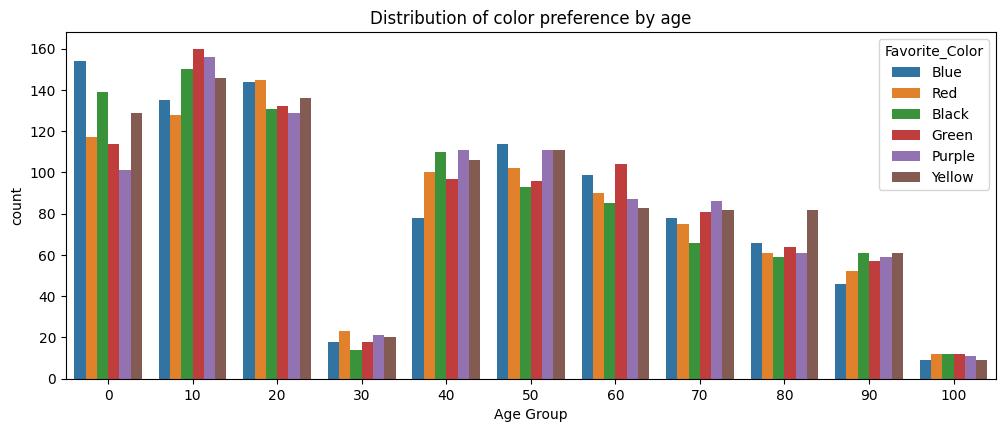

In [5]:
fig, ax = plt.subplots(figsize=(12, 4.5))
sns.countplot(x="Age Group", hue="Favorite_Color", ax=ax, data=df)
ax.set_title("Distribution of color preference by age");

If we look at the records with missing color preference, we see a similar pattern in relationship to age.  However, the drop in frequency of available values occurs instead in the 30-40 age group. 

If we were to drop *all* records with missing data, we would wind up with nearly no representation of people in the entire 20-40 age range.  This biased unavailability of data would be likely to weaken the analysis generally.  The number of records would remain fairly large, but the parameter space, as mentioned, would have an empty region, or at least one much less densely occupied.

Obviously, my statements depend both on the purpose of the data analysis and our assumptions about the underlying domain.  If age is not an important aspect of the problem in general, our approach might not matter much.  But if we think age is a signficant independent variable, dropping this data would probably not be a workable approach.

## Biasing trends

> It is not the slumber of reason that engenders monsters, 
> but vigilant and insomniac rationality.<br/>–Gilles Deleuze

This lesson shows explorations you should typically perform on a data set.  I cannot provide one simple answer for the best remediation of bias in missing data.  That decision will be greatly dependent upon the purpose for which the data is being used and also on background domain knowledge that may clarify the reasons for the data being missing.  Remediation is inevitably a per-problem decision. When you are able to detect a sample bias within your data, you will need to make a domain area judgement about the significance of that bias.

There are at least two kinds of sample bias that you should be on the lookout for.  On the one hand, the distribution of observations may not match the distribution in the underlying domain.  Quite likely, you will need to consult other data sources—or simply use your own domain area knowledge—to detect such a skew in the samples.  On the other hand, the data themselves may reveal a bias by trends that exist between multiple variables.  In this latter case, it is important to think about whether the detected "trend" could be a phenomenon you have detected in the data, or is a collection or curation artifact.

### Understanding Bias

<img src="img/bias.png"/>


In the most neutral statistical sense, bias is simply the fact that a data set does not accurately represent its underlying population. More often than not, neither we data scientists, who analyze data, nor the people or instruments that collected the raw data in the first place, can provide an unambiguous delineation of exactly what belongs to the underlying population.  In fact, the population is often somewhat circularly defined in terms of data collection techniques.

An old joke observes someone looking for their lost keys at night in the area under a street light.  Asked why they do not also look elsewhere, they answer that it is because the visibility is better where they are looking. Observers make observations of what they can *see*, and not what they cannot see. "Seeing" here is mostly metaphorical, to encompass voltages in an instrument, or bits on a wire, not just actual human eyes.

It is easy not to be conscious of bias that exists in data, and probably that much easier when it indeed *does* concern human or social subjects and human observers bring in psychological and social biases.  But it is humans, in the end, even if aided by instruments we set up, who make observations of everything else too.  

For example, the history of ethology (the study of animal behavior) is largely a history of scientists seeing the behaviors in animals that exist—or that they believe should exist—in the humans around them, that they impose by metaphor and blindness.  If you make a survey of books in your local library to determine the range of human literature or music, you will discover the predominance of writers and musicians who use your local language and play your local musical style.  Even in areas that seem most obviously *not about* humans, our vantage point may create a perspectival bias.  For example, if we catalog the types of stars that exist in the universe, and the prevalence of different types, we are always observing those within our cosmological horizon, which not only expresses an interaction of space and time, but also may not uniformly describe the entire universe.  Cosmologists know this, of course, but they know it as an inherent bias to their observations.

In [6]:
names = pd.read_parquet('data/usa_names_states.parq')
names['Age Group'] = names.Age//10 * 10
names

,Age,Birth_Month,Name,Gender,Home,Age Group
0,17,June,Matthew,M,Hawaii,10
1,5,September,Emma,F,West Virginia,0
2,4,January,Liam,M,Alaska,0
3,96,March,William,M,Arkansas,90
4,7,March,William,M,Hawaii,0
...,...,...,...,...,...,...
6337,88,July,Dorothy,F,Massachusetts,80
6338,29,August,Jessica,F,Massachusetts,20
6339,51,April,Michael,M,Wyoming,50
6340,29,May,Christopher,M,North Carolina,20


In this lesson, we will a synthetic U.S. name/age data to illustrate bias patterns.  These data approximately accurately represents the frequency of different names across different age groups, based on Social Security Administration data.  We can see that within the actual domain, the popularity of various names authentically changed over time.  As a few minutes ago, it is useful to aggregate people into coarser age groups for visualization.

I try to avoid social bias in the data sets I select or create as examples. For the imagined people in the rows of the name tables, I added features like favorite color or flower rather than more obviously ethnically or culturally marked features like eye color, favorite food, or musical preference.  

In [40]:
names.Name.unique()

array(['Matthew', 'Emma', 'Liam', 'William', 'Christopher', 'Robert',
       'Joshua', 'John', 'James', 'Deborah', 'Ashley', 'Linda', 'Jason',
       'Amy', 'Isabella', 'Amanda', 'Judith', 'Richard', 'Michael',
       'Mary', 'Sophia', 'Noah', 'Jacob', 'Mason', 'Samantha', 'Susan',
       'David', 'Ethan', 'Michelle', 'Lisa', 'Jennifer', 'Dorothy',
       'Melissa', 'Jessica', 'Olivia', 'Ava', 'Madison', 'Betty',
       'Patricia', 'Daniel', 'Karen', 'Carol', 'Barbara', 'Alexander',
       'Debra', 'Kimberly', 'Emily', 'Sarah', 'Heather', 'Charles',
       'Tyler', 'Shirley', 'Hannah', 'Andrew', 'Margaret', 'Logan',
       'Alexis', 'Joan', 'Helen', 'Abigail', 'Jayden', 'Nicholas',
       'Angela', 'Ruth', 'Brittany', 'Charle', 'Oliver', 'Donna',
       'Sandra'], dtype=object)

Even those invented features I use are not entirely independent of culture though, and perhaps my position in the social world leads me to choose different factor values than would someone located elsewhere.  Moreover, by choosing the *top 5* most popular names in the United States each year, I impose a kind of majority bias: all are roughly Anglo names, and none, for example, are characteristically African-American, Latino, Chinese, or Polish, though such are all common outside of that top-5-by-year collation methodology.

The fields `Birth_Month` and `Home` are added to this data set, and let us stipulate that we suspect they may indicate some bias in the observations.  Before we look at that, let us take a look at a more-or-less expected trend.

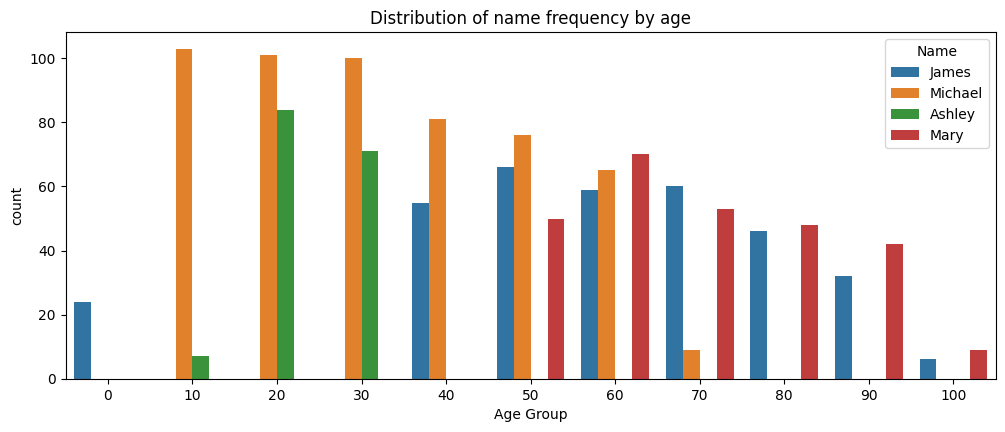

In [7]:
fig, ax = plt.subplots(figsize=(12, 4.5))
somenames = ['Michael', 'James', 'Mary', 'Ashley']
popular = names[names.Name.isin(somenames)]
sns.countplot(x="Age Group", hue="Name", ax=ax, data=popular)
ax.set_title("Distribution of name frequency by age");

We can see trends in this data.  Mary is a popular name among the older people in the data set, but no longer shows up in the most popular names for younger people.  Ashley is very popular among 20-40 year olds, but we do not see it present outside that age group.  James seems to have been used over most of the age range, although it fell out of the top-5  spot among 10-40 year olds, resurging among children under 10.  Michael, similarly seems represented from 10-60 years of age.

The top-5 threshold used in generation of the data has definitely created a few artifacts in the visualization, but a general pattern of some names becoming popular and others waning is exactly a phenomenon we would expect with a bare minimum of domain knowledge.  Moroever, if we know only a little bit more about popular baby names in the United States, the specific distribution of names will seem plausible; both for the 4 shown and for the remaining 65 names that you can investigate within the data set.

### Detecting Bias

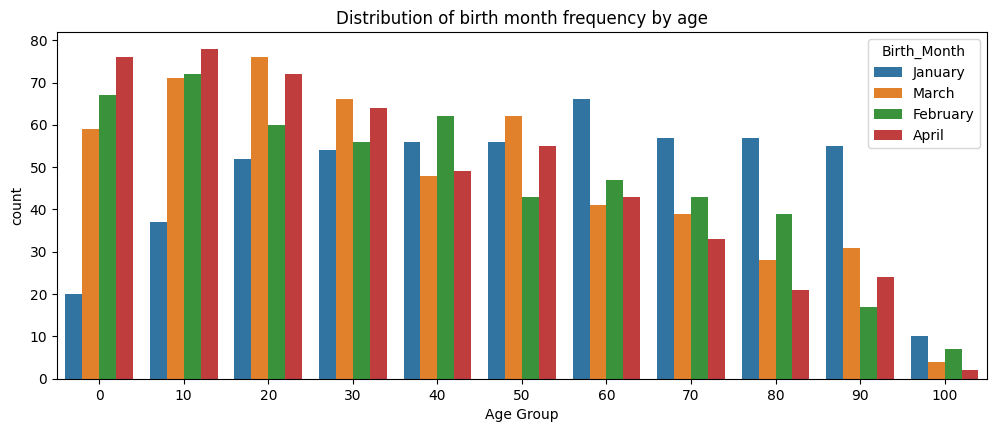

In [8]:
fig, ax = plt.subplots(figsize=(12, 4.5))
months = ['January', 'February', 'March', 'April']
popular = names[names.Birth_Month.isin(months)]
sns.countplot(x="Age Group", hue="Birth_Month", ax=ax, data=popular)
ax.set_title("Distribution of birth month frequency by age");

Let's apply a similar analysis to birth month as we did to name frequency.  A minumum of domain knowledge will tell you that while there are small annual cyclicities in birth month, there should not be a general trend over ages.  Even if some world historical event had dramatically affected births in one particular month of one particular year, this should create little overall trend when we aggregate over decades of age.

Contrary to our hope of excluding a biasing trend, we have discovered that—for unknown reasons—January births are dramatically underrepresented among the youngest people and dramatically overrepresented among the oldest people.  This is overlain on an age trend of there being more young people, in general, but the pattern nonetheless appears strong.  This graph does not look at months beyond April; this could be done in a similar fashion.

A certain amount of random fluctuation occurs in the data set simply because of sampling issues.  The fact that April is a somewhat more common birth month for 50-something people than for 40-something people in the data set is quite likely meaningless since there are relatively few data points (on the order of 50) once we have cross-cut by both age and birth month.  Distinguishing genuine data bias from randomness can require additional analysis. By construction, the January pattern jumps out strongly even in the simple visualization.

In [9]:
by_month = (names
    .groupby('Age Group')
    .Birth_Month
    .value_counts()
    .unstack())

by_month = by_month[month_names]
by_month

Birth_Month,January,February,March,April,May,June,July,August,September,October,November,December
Age Group,,,,,,,,,,,,
0,20,67,59,76,66,77,71,65,67,67,56,63
10,37,72,71,78,70,73,82,81,83,79,70,79
20,52,60,76,72,65,65,71,66,68,75,76,71
30,54,56,66,64,73,58,87,82,66,65,57,58
40,56,62,48,49,45,50,58,55,56,66,68,60
50,56,43,62,55,53,43,58,48,53,58,52,46
60,66,47,41,43,54,34,41,51,50,32,52,37
70,57,43,39,33,39,36,45,34,38,30,37,37
80,57,39,28,21,31,37,23,28,27,31,34,37


There are numerous ways we might analyze this month bias, but looking for notable differences in the spread of one variable in relation to another can be a good hint.  For example, we think we see an oddness in the pattern of January birth months, but is there a general irregularity in the distribution per age?  We *could* attempt to analyze this using exact age, but that probably makes the distinction too fine grained to have good subsample sizes.  The decade of age is an appropriate resolution for this test.  As always, think about your subject matter in making such judgements.

Since the number people of decreases with age, we need to find statistics that are not overly influenced by the raw numbers.  In particular, we can count the number of records we have for each age group and birth month and see if those counts are notably divergent.  Variance or standard deviation (of counts) will increase as the size of age group increases.  However, we can normalize that simply by dividing by the raw count within age group of all months.

In [10]:
by_month.var(axis=1) / by_month.sum(axis=1)

Age Group
0      0.289808
10     0.172563
20     0.061524
30     0.138908
40     0.077120
50     0.059772
60     0.169321
70     0.104118
80     0.227215
90     0.284632
100    0.079604
dtype: float64

That data grid remains a bit too much to immediately draw a conclusion about, so as described, let us look at the normalized variance across age groups.

The over 100 year old group shows a low normalized variance, but it is a small subset.  Among the other age groups, the middle ages show a notably lower normalized variance across months than do the older or younger people.  This difference is quite striking for those under 10 and those over 80 years old.  

We can reasonably conclude at this point that *some kind* of sample bias occurred in the collection of birth month; specifically, there is a different bias in effect based on age group of persons sampled.  Whether or not this bias *matters* for the purpose at hand, *the fact should be documented clearly* in any work products of your analyses or models.

In [50]:
states = pd.read_fwf('data/state-population.fwf')
states["House_Seats"] = states.House_Seats.round(0).astype(pd.UInt8Dtype())
del states["Population_2010"]

### Comparison to Baselines

In [49]:
states.head()

,State,Population_2019,House_Seats
0,California,39512223,53
1,Texas,28995881,36
2,Florida,21477737,27
3,New York,19453561,27
4,Pennsylvania,12801989,18


The setup of our synthetic person data introduced both birth month and `Home` in the sense of state or territory of residence and/or birth.  While there is no documented metadata that definitively clarifies the meaning of the column, let us take it as state of current residence.  If we had chosen to interpret it as birthplace, we might need to find historical data on populations at the times people of various ages were born; clearly that is possible, but the current assumption simplifies our task.

Let us take a look at the current population of the various U.S. states.  This will provide an external baseline relative to which to look for sample bias in the data set under consideration.

As most students will know, the range of population sizes across different U.S. states and territories is quite large.  Representation of states in the House of Representatives is given as a whole number.

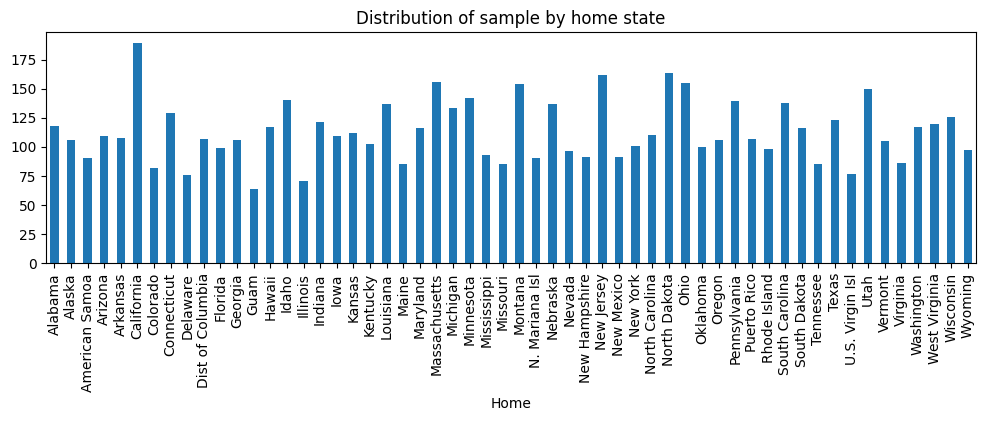

In [12]:
(names
    .Home
    .value_counts()
    .sort_index()
    .plot(kind='bar', figsize=(12, 3), 
          title="Distribution of sample by home state")
);

Let us take a look at the distribution of home states of persons in the data set. The step of sorting the index is used to assure that states are listed in alphabetical order, rather than by count or something else.

There is clearly variation in the number of samples drawn from residents of each state.  However, the largest state represented, California, has only about 3x the number of samples as the smallest.  In comparison, a similar view of the underlying populations emphasizes the different distribution.

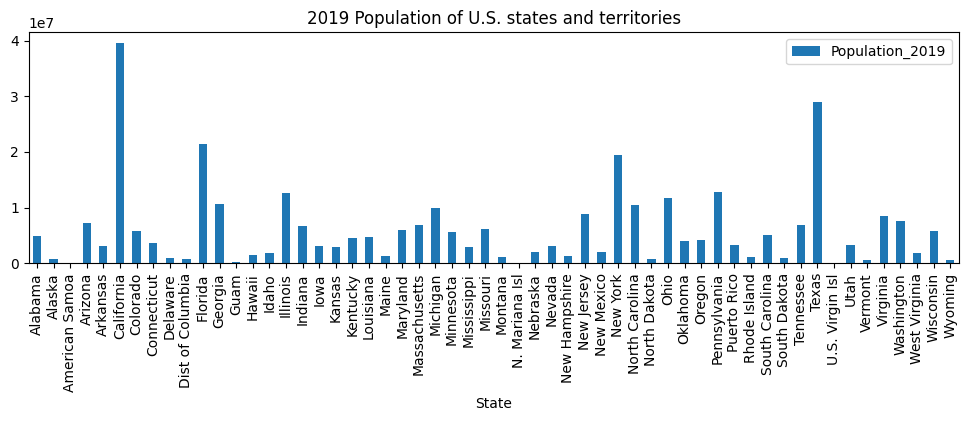

In [51]:
(states
    .sort_values('State')
    [['State', 'Population_2019']]
    .set_index('State')
    .plot(kind='bar', figsize=(12, 3),
          title="2019 Population of U.S. states and territories")
);

While California provides the most samples for this data set, Californians are simultaneously the *most underrepresented* relative to the baseline population of the states.  As a general pattern, smaller states tend to be overrepresented generally.  We can, and probably should, think of this as selection bias based on the size of the various states.  Unless we have accurate documentation or metadata that describes the collection and curation procedures, we cannot be sure of the cause of the imbalance.  But a strong trend exists in this inverse relationship of population to relative sample frequency.

A note here is that sometimes sampling approaches deliberately introduce similar imbalances.  If the actual samples were precisely balanced, with some fixed N collected per state, this would fairly clearly point to such a deliberate categorical sampling as opposed to a sampling based on an underlying rate.  The pattern we actually have is less obvious than that.  We might form an hypothesis that the sampling rate is based on some other underlying feature not directly present in this data.  For example, perhaps a fixed number of observations were made in each *county* of each state, and larger states tend to have more counties (this is *not* the actual underyling derivation, but thinking in this manner should be in your mind).  Understanding data integrity issues resembles either a scientific process of experimentation and hypotheis, or perhaps even more so a murder mystery.  Developing a reasonable theory of *why* the data is dirty is always a good first step in remediating it (or even in ignoring the issue as not pertinent to the actual problem at hand).

Let us turn to evaluating the important of uneven distribution of categorical variables.

### Benford's Law

There is a curious fact about the distribution of *digits* in many observed numbers called "Benford's Law."  For a large range of real-world data sets, we see leading "1" digits far more often than leading "2"s, which in turn occur far more commonly than leading "3"s, etc.  If you see this pattern, it probably does not reflect harmful bias; in fact, for many kinds of observations, if you *fail to* see it, that might itself reflect bias (or even fraud).

If a distribution precisely follows Benford's Law, it will specifically have digits distributed as:

$$P(d) = log_{10}\left(1 + \frac{1}{d}\right)$$

However, this distribution is often only approximate for real-world data.

When data is distributed according to a power law or a scaling factor, it becomes relatively intuitive to understand what leading digits will be distributed in a "biased" way.  However, much observational data that is not obviously scaling in nature still follows Benford's Law (at least approximately).  Let us pick an example to check; I scraped and cleaned up formatting for the populations and areas of the most populous U.S. cities.

In [14]:
cities = pd.read_fwf('data/us-cities.fwf')
cities

,NAME,POP2019,AREA_KM2
0,New York City,8336817,780.9
1,Los Angeles,3979576,1213.9
2,Chicago,2693976,588.7
3,Houston,2320268,1651.1
4,Phoenix,1680992,1340.6
...,...,...,...
312,San Angelo,101004,155.1
313,Vacaville,100670,75.1
314,Clinton,100471,72.8
315,Bend,100421,85.7


Let us first count the leading digits of populations.

In [15]:
pop_digits =  cities.POP2019.astype(str).str[0].value_counts()
pop_digits

POP2019
1    206
2     53
3     20
4     10
6      9
5      8
8      5
9      3
7      3
Name: count, dtype: int64

Asking the same question of area in square kilometers.

In [16]:
area_digits =  cities.AREA_KM2.astype(str).str[0].value_counts()
area_digits

AREA_KM2
1    118
2     47
3     31
4     23
9     21
8     21
7     20
6     20
5     16
Name: count, dtype: int64

Neither collection of data *exactly* matches the Benford Law ideal distribution, but both show the general pattern of favoring leading digits in roughly ascending order.

## Class imbalance

> It seems to be correct to begin with the real and the concrete, with 
> the real precondition, thus to begin [...] with the population.  However, 
> on closer examination this proves false. The population is an abstraction 
> if I leave out, for example, the classes of which it is composed.<br/>
> –Karl Marx

**Concepts**:

* Predicting rare events
* Imbalance in features versus in targets
* Domain versus data integrity imbalance
* Forensic analysis of sources of imbalance
* Stipulating the direction of causality

The data you receive will have imbalanced classes, if it has categorical data at all.  The several distinct values that a categorical variable may have are also sometimes called *factor levels* ("factor" is synonymous with "feature" or "variable", as discussed in the Preface and Glossary). Moreover, as discussed in the chapter 6 (*Value Imputation*) section on *Sampling*, dividing a continuous variable into increments can often usefully form synthetic categories also.  In principle, any variable might have a categorical aspect, depending on the purpose at hand.  When these factor levels occur with notably different frequency it may show selection bias or some other kind of bias; however, it very often simply represents the inherent nature of the data, and is an essential part of the observation.

A problem arises because many types of machine learning models have difficulty predicting rare events.  Discussion of concretely rebalancing classes is deferred until the chapter 6 discussion of undersampling and oversampling, but here we at least want to reflect on identifying class imbalance.  Moreover, while many machine learning techniques are highly sensitive to class imbalance, others are more-or-less indifferent to it.  Documentation of the characteristics of particular models, and their contrast with others, is outside the scope of this particular book.

In particular, though, the main difference in when class imbalance poses a difficulty versus when it is central to the predictive value of the data, is precisely the difference between a target and the features.  Or equivalently, the difference between a dependent variable and independent variables.  When we think of a rare event that might cause difficulty for a model, we usually mean a rare target value, and only occasionally are concerned about a rare feature.  When we wish to use sampling to rebalance classes, it is almost always in relation to target class values.

We will work with a simple example.  Two weeks of Apache server logs from my web server are provided as sample data.  Such a log file has a number of features encoded in it, but one particular value in each request is the HTTP status code returned.  If we imagine trying to model the behavior of my web sever, quite likely we would wish to treat this status code as a target that might be predicted by the other (independent) variables.  Of course, the log file itself does not impose any such purpose, it simply contains data on numerous features of each request (including response).

The status codes returned from the actual requests to my web server are extremely unbalanced, which is generally a good thing.  I want most requests to result in "200 OK" responses (or at least *some* 2xx code).  When they do not, there is either a problem with the URLs that users have utilized or there is a problem with the web server itself.  Perhaps the URLs were published in incorrect form, such as in links from other web pages; or perhaps deliberately wrong requests were used in attempts to hack my server.  I never really *want* a status code outside of 2xx, but inevitably some arise.  Let us look at their distribution:

In [17]:
%%bash
zcat data/gnosis/*.log.gz | 
    cut -d' ' -f9 | 
    sort | 
    uniq -c

  10280 200
      2 206
    398 301
   1680 304
    181 403
    901 404
      9 500


The 200 status dominates here.  The next highest occurrence is "304 Not Modified" which is actually fine as well.  It simply indicates that a cached copy on a client remains current.  Those 4xx and 5xx (and perhaps 301) status codes are generally undesirable events, and I may want to model the patterns that cause them.  Let us remind ourselves what is inside an Apache `access.log` file (the name varies by installation, as can the exact fields).

In [18]:
%%bash
zcat data/gnosis/20200330.log.gz | head -1 | fmt -w50

162.158.238.207 - - [30/Mar/2020:00:00:00 -0400]
"GET /TPiP/024.code HTTP/1.1" 200 75


There is a variety of data in this line, but notably it is easy to think of pretty much all of it as categorical.  The IP address is a *dotted quad*, and the first (and often second) quad tends to be correlated with the organization or region where the address originates.  Allocation of IPv4 addresses is more complex than we can detail here, but it may be that requests originating from a particular /8 or /16 origin tend to get non-200 responses.  Likewise, the date—while unfortunately not encoded as ISO-8601 format—can be thought of as categorical fields for month, hour, minute, and so on.

Let us show a bit of Pandas code to read and massage these records into a data frame.  The particular manipulations done are not the main purpose of this section, but gaining familiarity with some of these methods is worthwhile. 

One thing to notice, however, is that I have decided that I am not really concerned with the pattern where e.g. my web server became erratic for a day.  That has not occurred in this particular data, but if it had I would assume that was a one-off occurrence not subject to analysis.  The separate cyclical elements of hour and minute might detect recurrent issues (which are discussed more in later sections of this chapter).  Perhaps, for example, my web server gives many 404 responses around 3 a.m., and that would be a pattern/problem worth identifying.

In [19]:
def apache_log_to_df(fname):
    # Read one log file.  Treat is as a space separated file
    # There is no explicit header, so we assign columns
    cols = ['ip_address', 'ident', 'userid', 'timestamp', 
            'tz', 'request', 'status', 'size']
    df = pd.read_csv(fname, sep=' ', header=None, names=cols)
    
    # The first pass gets something workable, but refine it
    # Datetime has superfluous '[', but fmt matches that
    fmt = "[%d/%b/%Y:%H:%M:%S"
    df['timestamp'] = pd.to_datetime(df.timestamp, format=fmt)
    
    # Convert timezone to an integer
    # Not general, I know these logs use integral timezone
    # E.g. India Standard Time (GMT+5:30) would break this
    df['tz'] = df.tz.str[:3].astype(int)
    
    # Break up the quoted request into sub-components
    df[['method', 'resource', 'protocol']] = (
                df.request.str.split(' ', expand=True))
    
    # Break the IP address into each quad
    df[['quad1', 'quad2', 'quad3', 'quad4']] = (
                df.ip_address.str.split('.', expand=True))
    
    # Pandas lets us pull components from datetime
    df['hour'] = df.timestamp.dt.hour
    df['minute'] = df.timestamp.dt.minute
    
    # Split resource into the path/directory vs. actual page
    df[['path', 'page']] = (
                df.resource.str.rsplit('/', n=1, expand=True))
    # Only care about some fields for current purposes
    cols = ['hour', 'minute', 
            'quad1', 'quad2', 'quad3', 'quad4', 
            'method', 'path', 'page', 'status']
    return df[cols]

This function allows us to read all of the daily log files into a single Pandas DataFrame simply by mapping over the collection of file names and concatenating data frames.  Everything except perhaps `page` in the resulting data frame is reasonable to think of as a categorical variable.

In [20]:
reqs = pd.concat(map(apache_log_to_df, glob('data/gnosis/*.log.gz')))
# Each file has index from 0, so dups occur in raw version
reqs = reqs.reset_index().drop('index', axis=1)

In [21]:
# The /16 subnetwork is too random for this purpose
reqs.drop(['quad3', 'quad4'], axis=1, inplace=True)
reqs

,hour,minute,quad1,quad2,method,path,page,status
0,0,2,162,158,GET,/publish/mertz,Dissertation_PageFormat.pdf,200
1,0,2,173,245,GET,/download/gnosis/util,test?C=S%3BO%3DA,301
2,0,2,172,69,GET,/download/gnosis/util/test,?C=S%3BO%3DA,200
3,0,6,172,69,GET,/juvenilia,History%20of%20Mathematics.pdf,200
4,0,6,172,69,GET,,favicon.ico,200
...,...,...,...,...,...,...,...,...
13446,23,51,162,158,GET,/publish,hugoback.gif,304
13447,23,52,172,69,GET,/download/pywikipedia/cache,Aleksey%20Petrovich%20Yermolov,200
13448,23,52,108,162,GET,/publish/voting,privacy-electronic-voting.pdf,200
13449,23,52,162,158,GET,/publish/programming,charming_python_2.html,200


Within my web server, I have relatively few directories where content lives, but relatively many different concrete pages within many of those directories.  In fact, the path `/download/pywikipedia/cache` is actually a robot that performs some formatting cleanup of Wikipedia pages that I had forgotten that I left running 15+ years ago.  Given that it may be pointed to any Wikipedia page, there is effectively an infinite space of possible pages my server will reply to.  There are also a small number of long path components because URL parameters are sometimes passed in to a few resources.  Let us visualize the distribution of the other features in this data set, with an eye to the places where class imbalance occurs.

In [22]:
def show_distributions():
    fig, axes = plt.subplots(3, 2, figsize=(12, 9))
    
    # Which factors should we analyze for class balance?
    factors = ['hour', 'minute', 'quad1', 'quad2', 'method', 'status']
    
    # Loop through the axis subplots and the factors
    for col, ax in zip(factors, axes.flatten()):
        # Minute is categorical but too many so quantize
        if col == 'minute':
            data = (reqs[col] // 5 * 5).value_counts()
        else:
            data = reqs[col].value_counts()
        data.plot(kind='bar', ax=ax)
        ax.set_title(f"{col} distibution")
    
    # Matplotlib trick to improve spacing of subplots
    fig.tight_layout()

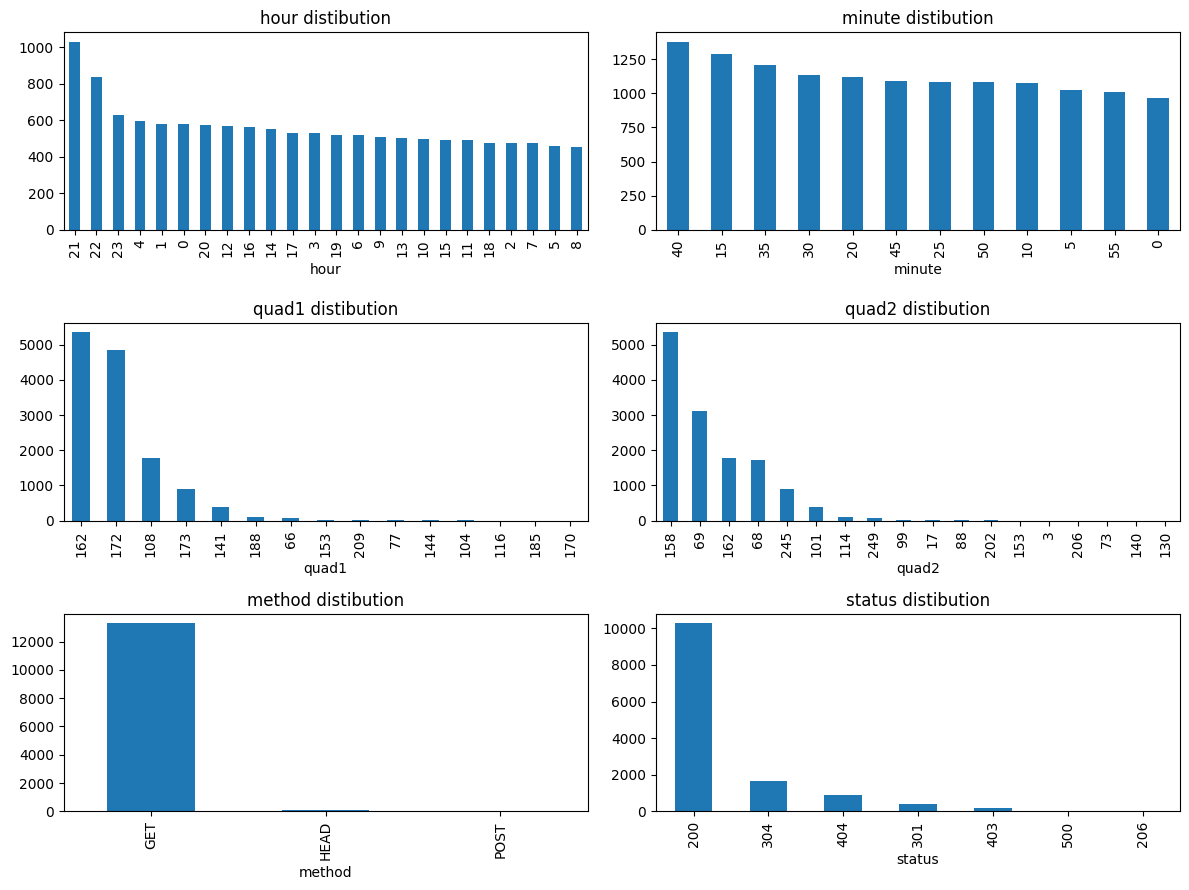

In [23]:
show_distributions()

In the plots we see some highly imbalanced classes and some mostly balanced ones.  The hours show a minor imbalance, but with a fairly strong pattern of more requests around 21:00–24:00 in Atlantic Daylight Time.  Why my hosted server is in that timezone is unclear to me, but this is around 6 p.m. US Pacific Time, so perhaps users in California and British Columbia tend to read my pages after work.  The distribution of 5 minute increments within an hour is generally uniform, although the slight elevation of a few increments could possibly be more than random fluctuation.

The imbalance in the initial quads of IP address seems striking, and might initially suggest an important bias or error.  However, after probing only slightly deeper, we can determine using online "whois" databases that (at the time of this writing) both 162.158.0.0/16 and 172.69.0.0/16 are assigned to the CDN (content delivery network) that I use to proxy traffic.  So the imbalance in these features has simply provided a clue that almost all requests are proxied through a known entity.  In particular, it means that we are unlikely to be able to use these features usefully in any kind of predictive model.  At most, we might perform feature engineering to create a derived feature such as `is_proxied`.

The class imbalances that remain are in the HTTP method and in the status code returned.  In neither case is it at all surprising that GET and 200 dominate the respective features.  This is what I expect, and even hope for, in the behavior of my web server and web site.  So nothing there suggests bias in the data collection; since *all* requests were logged, this is not a sample but rather a complete domain.  As a side note, the population is specifically delineated, and cannot necessarily be used to describe anything beyond those lines.  These are all requests made to port 80 or port 443 for the web domain gnosis.cx, between March 29, 2020 and April 11, 2020; we can draw no conclusion about other web domains or other dates without further analysis or reasoning about how typical this data is of the web as a whole.

As data scientists, we are not necessarily constrained by temporal causality.  For example, it is clear that in a literal and sequential way, the requesting IP address, possibly the userid, maybe the time of the request, and definitely the URL of the request, both method and path, will *cause* a certain status code and number of bytes to be returned.  In many cases (probably all of them on my simple, static website), the size is simply that of the underlying HTML page.  But in concept, a server might do something different depending on the date and time, or on the requesters address.  In any case, certain *facts* about the request exist a few milliseconds before the server decides on the appropriate status code and response size and logs all of that.

However, for an analysis, we might want to make predictions that exactly reverse causality.  Perhaps we would like to treat the size of the response as an independent variable in our effort to predict time of day.  For example, it could be that large files are always requested around 7 p.m. rather than at other times. Our *model* might try to predict a cause from its effect—and that is perfectly legitimate in data science, as long as we are aware of it.  In fact, we may only look for correlations, entirely ignoring for a particular task the potential hidden cause of multiple features.  Data science is something different from other sciences; the endeavors are, hopefully, complementary.

---

For this section, we focused merely on recognizing, and to a limited extent analyzing, class imbalance.  What it means for the actual task to which we wish to put this data is another matter.  A significant distinction to keep in mind is that between independent and dependent variables.  Generally, imbalance in a dependent variable will skew classification models in a more important way than imbalance in an independent variable.  So, for example, if we wish to predict the likely status code that will be produced by a request based on other features of the request, we would be likely to use sampling techniques to *balance the data set* synthetically.

On the other hand, class imbalance is not completely irrelevant in independent variables, at least not for all kinds of models.  This very much depends on the kind of model.  If we use something in the family of decision trees, for example, it makes little difference that HEAD requests are rare if we wish to detect the (hypothetical) fact that HEAD is strongly associated with 500 status codes.  However, if we use a K-nearest neighbors family of algorithm, the actual distance in parameter space can be important.  Neural networks fall somewhere in the middle in terms of sensitivity to class imbalance in independent variables. If we encode the HTTP method either as an ordinal value or using one-hot encoding, we may naïvely *underweight* that strong but rare feature.  One-hot encoding is discussed in the lesson on *Feature Engineering*. For an independent variable, we would not generally wish to *oversample* a rare factor level; but we might wish to artificially *overweight* it.

We also should think about the numeric ranges of data, which might reflect very different underlying units.

## Normalization and scaling

> Measure with a micrometer. Mark with chalk.. Cut with an axe.<br/>–Rule for precision

The idea behind normalization of data is simply bringing all the features being utilized in a data set into a comparable numeric range.  When starkly different units are used for different features—that is, for dimensions of a parameter space—some machine learning models will disproportionately utilize those features which simply have a larger numeric range.  Special cases of differently scaled numeric ranges occur when one feature has outliers that have not been removed, or when one feature is normally distributed but another feature is exponentially distributed.

This book generally steers away from showing machine learning examples or code.  There are many wonderful libraries that address that 20% of your work, as a data scientist, that you will do after you have done the 80% that this book teaches you.  However, to emphasize the motivation for normalization, we will create a very simple ML model on some overly neat data that illustrates an overwhelming benefit with scaling.  For this example, a small amount of code in scikit-learn is used.  Notably, however, the scaler classes in scikit-learn are extremely useful even if you do not wish to use that library for modeling.  It is certainly reasonable—and perhaps even best practice within Python—to use scikit-learn even if you only ever perform normalization with it.

The synthetic data set here has two features and one target; all are continuous variables.

In [24]:
unscaled = make_unscaled_features()
unscaled

,Feature_1,Feature_2,Target
0,0.112999,19247.756104,11.407035
1,0.204178,23432.270613,20.000000
2,0.173678,19179.445753,17.336683
3,0.161411,17579.625264,16.633166
4,0.192209,19255.160726,19.095477
...,...,...,...
195,0.110874,20213.848541,10.502513
196,0.137692,20934.654450,13.316583
197,0.184393,18855.241195,18.241206
198,0.177846,19760.314890,17.839196


At a glance, we can see that the Target values are on the order of 15, while Feature_1 is on the order of 0.1 and Feature_2 is on the order of 20,000.  The invented example does not assign any specific units for these measures, but there are many quantities you might measure whose units produce numeric values in those ranges.  As an initial question, we might ask whether any of the features have a univariate correlation with the target.  A machine learning model will find more than just this, but it is a useful first question.

In [25]:
unscaled.corr()

,Feature_1,Feature_2,Target
Feature_1,1.000000,-0.272963,0.992514
Feature_2,-0.272963,1.000000,-0.269406
Target,0.992514,-0.269406,1.000000


We see that Feature_1 has a very strong positive correlation with the Target, and Feature_2 has a moderate negative correlation.  So on the face of it, a model should have plenty to work with.  Indeed, we can tell from the correlation matrix that linear models would do extremely well, with or without normalization; but that is the topic of a different book.  This point can be made visually by plotting Target against each feature.  

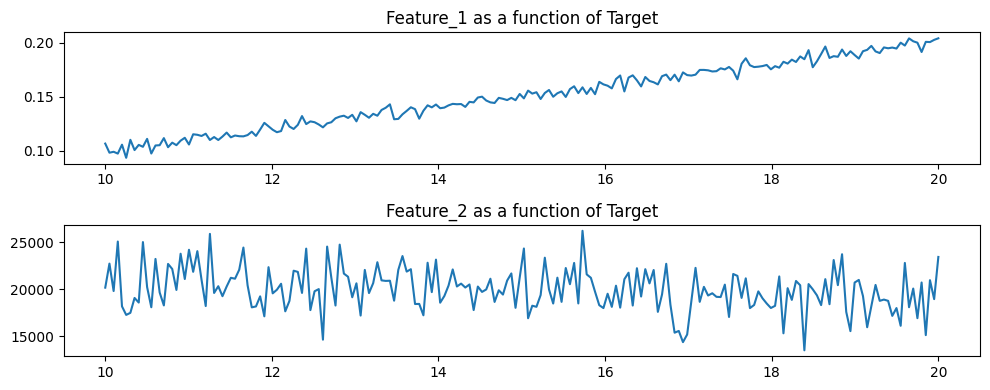

In [26]:
plot_univariate_trends(unscaled)

Feature_1 has a visually obvious correlation, Feature_2 reveals at most a very weak one to a human eye.

### Applying a Machine Learning Model

As promised, let us apply a machine learning model against this data, trying to predict the target based on the features.  In ML, we conventionally use the names X and y for features and target, respectively.  This follows the common pattern, from high school algebra, of naming an independent variable 'x' and a dependent variable 'y'. Since we generally have multiple features, a capital 'X' is used.  While we cannot discuss the motivation in any depth, good practice in machine learning is to always reserve a portion of your training data for testing, so that you do not overfit your model.  That is done with the function `train_test_split()`.

In [27]:
from sklearn.model_selection import train_test_split

X = unscaled.drop('Target', axis=1)
y = unscaled['Target']

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=1))

For the example, we use a K-neighbors regressor to try to model our data.  For many kinds of problems, this is a very effective algorithms, but it is also one that looks directly at distances in parameter space, and is hence very sensitive to scaling.  If we naïvely apply this model to our raw data, the R-squared score is very low (other metrics would be similarly bad).

In [28]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train).score(X_test, y_test)

0.027756186064182953

A "perfect" R-squared score is 1.0.  A very bad score is 0.0 (negative scores are also sometimes possible, and even worse in a sense.  But for anything below 0.25 or so, we essentially reject the model.

By using, in this case, a min-max scaler, we achieve a far better metric score.  The scaler we use here simply takes the minimum value of the raw feature, and shifts all values by that amount toward zero by subtraction, then divides all values by the shifted maximum value.  The effect is to produce a range that is always [0, 1], for every feature.  This synthetic feature does not have any physical meaning per se, as the original measure presumably did.  But by applying this scaler, all features are guaranteed to occupy the same numeric range (with the specific values distributed differently within their ranges). Let us apply this min-max scaling to our features before fitting the model again.

In [29]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = (
    train_test_split(X_new, y, random_state=1))

knn2 = KNeighborsRegressor()
knn2.fit(X_train, y_train).score(X_test, y_test)

0.9743878175626131

Notice that I did not bother to scale the target in the above code.  There would be no harm in doing so for the model, but there is no benefit either since the target is not part of the parameter space of the features.  Moreover, if we scaled the target, we would have to remember to unscale it correspondingly to get a meaningful number in the desired units.

### Scaling Techniques

The scaling technique we used above utilized scikit-learn's MinMaxScaler.  All of the scalers in scikit-learn use the same API, and are implemented in an efficient and correct manner.  There is certainly a good argument for using those within Python, even if scikit-learn is not otherwise part of your overall modeling pipeline.  However, it is not difficult to do the same scaling "by hand" using lower-level vectorized operations.  For example, this would be simple in NumPy, here we show an example in R, and focus only on the algorithm.  One nice detail of the scikit-learn API is that it knows to normalize column-by-column.  In the comparison, we only do one column.

```
%%R -i X,X_new
# Import the data frame/array from Python
py_raw_data <- X$Feature_1  # only feature 1
py_scaled <- X_new[,1]      # scaled column 1

# Utility function to scale as [0, 1]
normalize <- function(x) {
    floor <- min(x)  # Only find min once
    return ((x - floor) / (max(x) - floor))
}

# Scale the raw data
r_scaled <- normalize(py_raw_data)

# Near equality of elements from normalize() and MinMaxScaler
all.equal(py_scaled, r_scaled)
```

Notice that even for a straightforward operation like this, the different implementations, across libraries and languages, do not perform identical operations in an identical order.  This allows for some floating-point rounding differences to creep in.  Comparing for strict equality of floating-point values is almost always the wrong thing to do; measurements have finite precision and operations introduce 1-ULP (unit in the last place) errors frequently.  On the other hand, these slight numeric differences make no practical difference for actual models, only for equality checks. 

```
%%R
print("A few 'equalities':")
print(py_scaled[1:5])
print(r_scaled[1:5])

print("Exactly equal?")
print((py_scaled == r_scaled)[1:10])

print("Mean absolute difference:")
print(mean(abs(py_scaled - r_scaled)))
```

Another very common scaling technique is called StandardScaler in scikit-learn.  It sets the mean of a feature to zero and the standard deviation to one.  This scaling is particularly relevant when a variable is (very roughly) normally distributed.  The name hints that this approach is usually the default scaler to choose (although probably it derives from "standard deviation" when the name was chosen).  Let us implement it to illustrate the simple transformation.  Here we display the values from Feature_2 which are around 20,000 in the raw data.

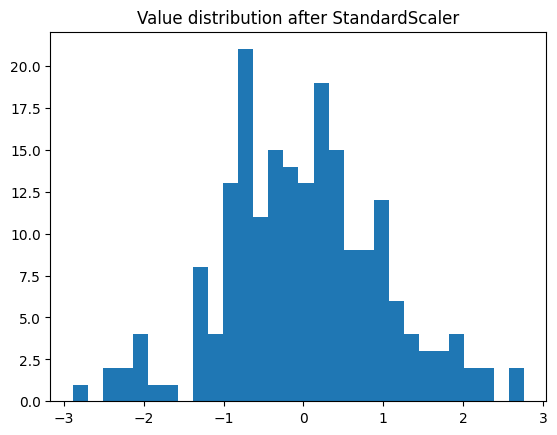

In [30]:
from sklearn.preprocessing import StandardScaler
X_new2 = StandardScaler().fit_transform(X)

# Second column for example (both were scaled)
plt.hist(X_new2[:, 1], bins=30)
plt.title("Value distribution after StandardScaler");

The StandardScaler uses more numeric operations than MinMaxScaler, since it involves standard deviation, and that gives the calculation more opportunity for introducing numeric errors.  The code in scikit-learn performs tricks to minimize this error better than the simple version we present, although again the magnitude is unlikely to be genuinely important. Let us manually reproduce the basic operation of StandardScaler.

```
%%R -i X,X_new2
# Import the data frame/array from Python
py_raw_data <- X$Feature_2  # Only feature 2
py_scaled <- X_new2[, 2]    # scaled column 2

r_scaled = (py_raw_data - mean(py_raw_data)) / 
            sd(py_raw_data)

all.equal(py_scaled, r_scaled)
```

In this calculation we do not pass the `all.equal()` test.  R characterizes the failure beyond only a boolean FALSE.  We can make the comparison with a bit more laxness by setting the tolerance parameter.  Let us also verify characteristics of the scaled data.

```
%%R
print("Mean from R scaling:")
print(mean(r_scaled))

print("Standard deviation:")
print(sd(r_scaled))

print("Almost equal with tolerance 0.005")
all.equal(py_scaled, r_scaled, tolerance = 0.005)
```

A number of variations are available for scaling through basic multiplication and subtraction operations.  For example, rather than normalize on standard deviation, we could normalize using inter-quartile range (IQR).  The scikit-learn class RobustScaler does this, for example.  To some degree, IQR—or generally quantile-based approaches—are more robust against outliers.  However, the degree to which IQR range scaling normalizes is limited, and a stricter quantile approach can be more aggressive.

Let us replicate Feature_1 in the sample data set we are presenting, but make just one value (out of 200) an *extreme* outlier.  Recall that Feature_1 has values on the order of 0.1.  We will introduce a single value of 100 into the variable.  Arguably, this is an extreme enough outlier that we should have removed it already, but for whatever reason we did not.

In [31]:
X['Feature_3'] = X.Feature_1
X.loc[0, 'Feature_3'] = 100

When we attempt to utilize RobustScaler, the transformed data still has one data point at an extreme value.  In fact, that extreme is worse than the out-of-bounds value, 100, that we selected; moreover, the outlier is even farther out than under a StandardScalar transformation.  RobustScaler is really only productive under a collection including a moderate number of moderate outliers (of the sort that might have escaped anomaly detection).

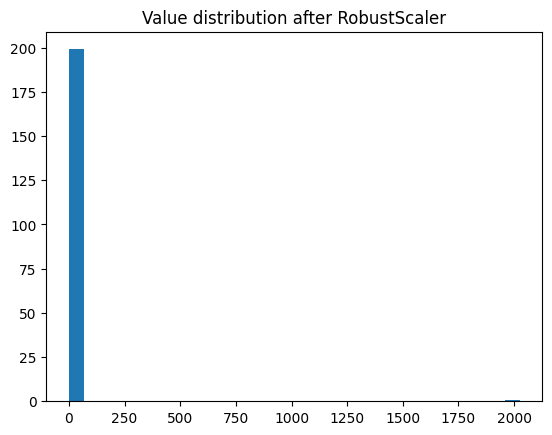

In [32]:
from sklearn.preprocessing import RobustScaler
X_new3 = RobustScaler().fit_transform(X)

# Third column for example (all were scaled)
plt.hist(X_new3[:, 2], bins=30)
plt.title("Value distribution after RobustScaler");

A stronger approach we can use is to rigorously scale values so that they fall *exclusively* within quantiles.  In essence, this scales the data within each quantile range separately, and hence imposes both reasonable distribution overall and strict bounds on values.

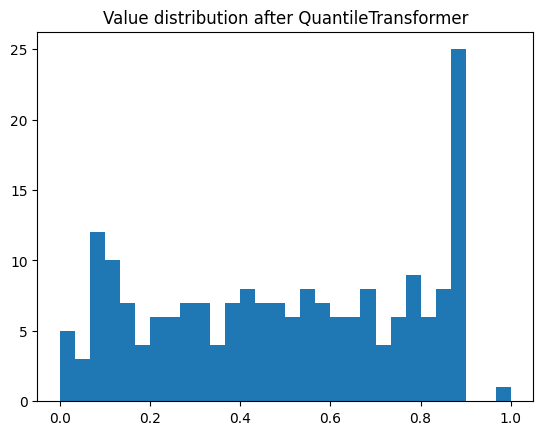

In [33]:
from sklearn.preprocessing import QuantileTransformer
# Ten quantiles is also called "decile"
deciles = QuantileTransformer(n_quantiles=10)
X_new4 = deciles.fit_transform(X)

# Third column for example (all were scaled)
plt.hist(X_new4[:, 2], bins=30)
plt.title("Value distribution after QuantileTransformer");

Obviously this transformed data is not completely uniform—it would have little value if there was not *some* variability beyond ordinal order—but it is bounded and reasonably evenly distributed across the range [0, 1].  The single outlier point remains as a minor outlier from the main distribution, but numerically not very distant.

In principle, even though the specific transformers in scikit-learn operate in a column-wise fashion, we might wish to apply different scaling technique to each column or feature.  As long at the particular transformation generates numeric ranges among the transformed values on roughly the same scale (i.e. usually of about distance one or two between maximum and minimum value, at least for the majority of data), all machine learning techniques that utilize distance in parameter space as part of their algorithm will be satisfied.  Examples of algorithms utilizing distance in parameter space include linear models, support vector machines, and k-nearest neighbor. As was mentioned, algorithms in the family of decision trees simply do not care about specific distance in a dimension, and neural networks can perform a kind of scaling by allowing what we can informally call a "scaling layer" that at least *might* act as a multiplier of each input feature (exactly what a trained network "decides" to use neurons and layers for is always somewhat opaque to our intentions or understanding).

### Factor and Sample Weighting

There are times when you will wish to give a particular feature more significance than *fair scaling* across features allots. However, oversampling across two distinct unbalanced classes has the potential to explode the number of synthetic samples.

In the case of unbalanced feature classes, another approach is available.  We can simply *overweight* minority classes rather than oversample them.  Many machine learning models contain an explicit *hyperparameter* called something like `sample_weight` (the scikit-learn spelling).  Seperately from the sample weights, however, these same model classes will also sometimes have something like `class_weight` as a separate hyperparameter.  The distinction here is exactly the one we have been making: sample weight allows you to overweight (or underweight) specific rows of input data, while class weight allows you to over/underweight specific target class values.

To add more nuance to this matter, we are not restricted to over/underweighting only to address class imbalance.  We can, in fact, apply it for any reason we like.  For example, we may know that certain measurements in our data set are more reliable than others, and wish to overweight those.  Or we may know that getting predictions right for samples with a certain characteristic is more important for task-specific reasons, even while not wishing entirely to discard those samples lacking that characteristic.

Let us return to the Apache log file example to illustrate all of these concerns.  Recall that the processed data looks something like this:

In [34]:
reqs.sample(8, random_state=72).drop('page', axis=1)

,hour,minute,quad1,quad2,method,path,status
3347,23,56,162,158,GET,/download/pywikipedia/cache,200
2729,12,31,172,68,GET,/TPiP,200
8102,1,44,172,69,GET,/download/eml3,200
9347,12,38,172,69,HEAD,/publish/mertz,200
6323,1,24,172,69,GET,/icons/silk,200
2352,23,19,162,158,GET,/download/gnosis,200
12728,3,4,172,69,GET,/publish/images,200
12235,13,1,173,245,GET,/download/gnosis/util,200


We noted that both method and status are highly imbalanced in pretty much the way we expect them to be in a working web server.  The method specifically has this imbalance which we saw plotted above.  The hypothetical task we have in mind is to predict status codes based on the other features of the data set (without actually issuing an HTTP request; which might change based on the current time, for example).

In [35]:
reqs.method.value_counts()

method
GET     13294
HEAD      109
POST       48
Name: count, dtype: int64

In other words, GET requests are 122 times more common than HEAD requests, and 277 times more common than POST requests.  We may be concerned that this limits our ability to make predictions on the rare class values for the method.  Often our models will simply figure this out for us, but sometimes they will not.  Moreover, although it is a frequently occuring `path`, we have decided that we need our model to be more sensitive to paths of `/TPiP` and so will artificially overweight that by 5x as well.  This overweighting is simply by stipulation of a domain purpose, not inherent to the data.  Notice that in this stipulation, the overweighting has nothing whatsoever to do with the underlying distribution of the feature, but rather is a domain requirement of the underlying purpose of our modeling.

Likewise, we are especially concerned to predict 404 status codes (i.e. enhance the *recall* of this label), but are not necessarily interested in the overall balance of the target.  Instead, we will weight all other outcomes as 1, but weight 404s as 10, for task purposes we have determined before performing modeling.  Let us do all of that in code, in this case using a random forest model from scikit-learn.  Should some row match both the overweighted `path` and an underrepresented `method`, the larger multiplier for the method will take precedence.

In [36]:
# The row index positions for rows to overweight
tpip_rows = reqs[reqs.path == '/TPiP'].index
head_rows = reqs[reqs.method == 'HEAD'].index
post_rows = reqs[reqs.method == 'POST'].index

# Configure the weights in a copy of data frame
reqs_weighted = reqs.copy()
reqs_weighted['weight'] = 1  # Default weight of one
reqs_weighted.loc[tpip_rows, 'weight'] = 5
reqs_weighted.loc[head_rows, 'weight'] = 122
reqs_weighted.loc[post_rows, 'weight'] = 277

# Do not use column page in the model
reqs_weighted.drop('page', axis=1, inplace=True)

# View the configured weights
reqs_weighted.sample(4, random_state=72)

,hour,minute,quad1,quad2,method,path,status,weight
3347,23,56,162,158,GET,/download/pywikipedia/cache,200,1
2729,12,31,172,68,GET,/TPiP,200,5
8102,1,44,172,69,GET,/download/eml3,200,1
9347,12,38,172,69,HEAD,/publish/mertz,200,122


These sample weights are stored on a per-row basis, in other words we have 13,451 of them.  For the example, most are simply weight 1, but they could all be distinct numbers, in concept.  Configuring the weights we wish to use with the target is different.  We *could* leverage the sample weight itself to choose rows with certain target label; however, that approach is unnecessarily clunky and is not usually our preferred approach.  Instead, we simply wish to create a small mapping from label to weight.

In [37]:
target_weight = {code:1 for code in reqs.status.unique()}
target_weight[404] = 10
target_weight

{200: 1, 301: 1, 404: 10, 403: 1, 304: 1, 500: 1, 206: 1}

Here we will create, fit, train, and score a scikit-learn model.  The API will vary if you use some other library, but the concepts will remain the same.  It only take a line to perform a train/test split, as is good practice in real code.  As a minor API detail, we need to encode our string categorical values for this model type, so we will use `OrdinalEncoder`.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

# Create the model object with target weights
rfc = RandomForestClassifier(class_weight=target_weight,
                             random_state=0)

# Select and encode the features and target
X = reqs_weighted[['hour', 'minute', 
                   'quad1', 'quad2',
                   'method', 'path']]

# Encode strings as ordinal integers
X = OrdinalEncoder().fit_transform(X)
y = reqs_weighted['status']
weight = reqs_weighted.weight

# Perform the train/test split, including weights
X_train, X_test, y_train, y_test, weights_train, _ = (
     train_test_split(X, y, weight, random_state=1))

# Fit the model on the training data and score it
rfc.fit(X_train, y_train, sample_weight=weights_train)
rfc.score(X_test, y_test)

0.8251561106155219

As with R-squared used in the regression example, 1.0 represents perfect *accuracy*.  Accuracy cannot be less than 0.0 though.

Without more context and analysis, I cannot say whether this model does well or poorly for the intended purpose.  Quite possibly some other model class and/or some better tuned weights would serve the hypothetical purpose better.  The steps in trying those are straightforward, and mostly the same as the code shown. 

We turn now to a difficult but important concept.  Many times we wish to remove expected trends from data to reveal the exceptions to those trends.

## Denouement

> Quality is never an accident. It is always the result of intelligent effort.
> <br/>–John Ruskin

In this lesson we focused on the problem of bias in data.  Data sets rarely, if ever, completely represent a population; rather they skew and select from that population to form a certain kind of picture.  Sometimes this bias is intentional and well-founded as a way of filling parameter spaces.  Other times it simply reflects the distribution of quantities or classes in the underlying reality. In this case it is both the inherent virtue of our data and a pitfall in our analysis.  But at other times still, elements of the data collection, collation, transcription, or aggregation, can introduce biases that are more subtle and may need to be remediated in some manner for our analyses and modeling of the data.  Detecting bias is the first step towards addressing it.

Related to bias, but somewhat parallel as a concern, are cyclicities in data.  Very often a particuar series of data—when the data is ordered in some manner, often as a time series—has components of "signal" and "variation" that can be usefully separated.  A signal is, in some sense, a kind of bias, in that it provides an expectation that at time T there is a higher probability the measurement will be close to M.  Identifying the signals is often an important aspect of data analysis—they are often not a priori—but identifying the deviations from the signal also provides an additional channel of interesting information.

The lesson on anomaly detection provided hints about identifying data that is generically statistically unlikely within a collection of values.  But very often we want to look at problems that are more domain specific.  We are often able to take advantage of expectations we have about patterns in clean data that might be violated by the data we actually have.  These patterns might only be represented by custom code that algorithmically expresses these expectations but that cannot be formulated in terms of generic statistical tests.